In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
df = pd.read_csv(r"C:\Users\deepa\OneDrive\Documents\DataScience-POC-Usecase\Data\Training-Data-Sets.csv")
df.head()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


## 1. EDA

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 39 columns):
Day                                   12000 non-null int64
EQ                                    12000 non-null float64
Social_Search_Impressions             12000 non-null int64
Social_Search_Working_cost            12000 non-null int64
Digital_Impressions                   12000 non-null int64
Digital_Working_cost                  12000 non-null int64
Print_Impressions.Ads40               12000 non-null int64
Print_Working_Cost.Ads50              12000 non-null int64
OOH_Impressions                       12000 non-null int64
OOH_Working_Cost                      12000 non-null int64
SOS_pct                               12000 non-null int64
Digital_Impressions_pct               12000 non-null int64
CCFOT                                 12000 non-null int64
Median_Temp                           12000 non-null int64
Median_Rainfall                       12000 non-null float64
Fu

In [37]:
df.describe()

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,12000.00000,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,1.200000e+04,1.200000e+04,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,6000.50000,638.008496,1.962056e+07,63131.860167,6.663405e+06,218973.240167,194404.538917,95406.492167,4.526812e+08,1.975918e+06,...,50.354613,28.902704,106.173423,38.655960,46.162093,70.641081,6.688170e+06,549685.650917,0.218851,40.159309
std,3464.24595,1200.109675,1.084298e+07,34518.859817,3.824995e+06,124075.882373,85857.419707,55041.846012,2.308381e+08,1.017836e+06,...,16.440054,9.506248,8.229686,3.903151,1.893655,5.081959,3.179592e+06,197373.143664,0.098834,5.129030
min,1.00000,0.019459,8.741110e+05,3546.000000,2.344000e+04,3493.000000,46372.000000,462.000000,5.435061e+07,2.374290e+05,...,21.890000,12.340000,91.900000,31.900000,42.900000,61.900000,1.234920e+06,209473.000000,0.047200,31.230000
25%,3000.75000,57.604317,1.021389e+07,33164.000000,3.330268e+06,112318.250000,120124.750000,47610.000000,2.519760e+08,1.095344e+06,...,36.100000,20.720000,99.030000,35.260000,44.520000,66.290000,3.965402e+06,380095.250000,0.133175,35.730000
50%,6000.50000,210.732487,1.949458e+07,62888.500000,6.715113e+06,218230.500000,193609.500000,95586.000000,4.540579e+08,1.959212e+06,...,50.190000,28.960000,106.150000,38.625000,46.170000,70.670000,6.619380e+06,547465.000000,0.220000,40.200000
75%,9000.25000,665.093566,2.913852e+07,92461.750000,9.956033e+06,326631.250000,268843.750000,143789.750000,6.557911e+08,2.854418e+06,...,64.572500,37.240000,113.282500,42.030000,47.790000,75.030000,9.430345e+06,719804.750000,0.305400,44.560000
max,12000.00000,18557.563800,3.827240e+07,123421.000000,1.323874e+07,432340.000000,342242.000000,190389.000000,8.493609e+08,3.748194e+06,...,78.730000,45.340000,120.440000,45.440000,49.440000,79.440000,1.223400e+07,893820.000000,0.389300,49.020000


### 1.1 Check for Null Values for feature variables:

In [38]:
df.isna().sum()

Day                                   0
EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0


### 1.2 Check for duplicate values:

In [39]:
duplicateRowsdf = df[df.duplicated()]
print(duplicateRowsdf)

Empty DataFrame
Columns: [Day, EQ, Social_Search_Impressions, Social_Search_Working_cost, Digital_Impressions, Digital_Working_cost, Print_Impressions.Ads40, Print_Working_Cost.Ads50, OOH_Impressions, OOH_Working_Cost, SOS_pct, Digital_Impressions_pct, CCFOT, Median_Temp, Median_Rainfall, Fuel_Price, Inflation, Trade_Invest, Brand_Equity, Avg_EQ_Price, Any_Promo_pct_ACV, Any_Feat_pct_ACV, Any_Disp_pct_ACV, EQ_Base_Price, Est_ACV_Selling, pct_ACV, Avg_no_of_Items, pct_PromoMarketDollars_Category, RPI_Category, Magazine_Impressions_pct, TV_GRP, Competitor1_RPI, Competitor2_RPI, Competitor3_RPI, Competitor4_RPI, EQ_Category, EQ_Subcategory, pct_PromoMarketDollars_Subcategory, RPI_Subcategory]
Index: []

[0 rows x 39 columns]


##### Result : There are no duplicate rows found,

### 1.3 Check for negative feature variables:

In [40]:
sum(n < 0 for n in df.values.flatten())

0

##### Result : No negative values found in entire Dataframe.

### 1.4 Check for multicollinearity:

In [41]:
#df_feature = df.drop(['EQ'], axis = 1)
df_feature = df
df_feature = df_feature[df_feature.columns[1:39]]
df_feature.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


----------------------------------------------Correlation plot-------------------------------------------------


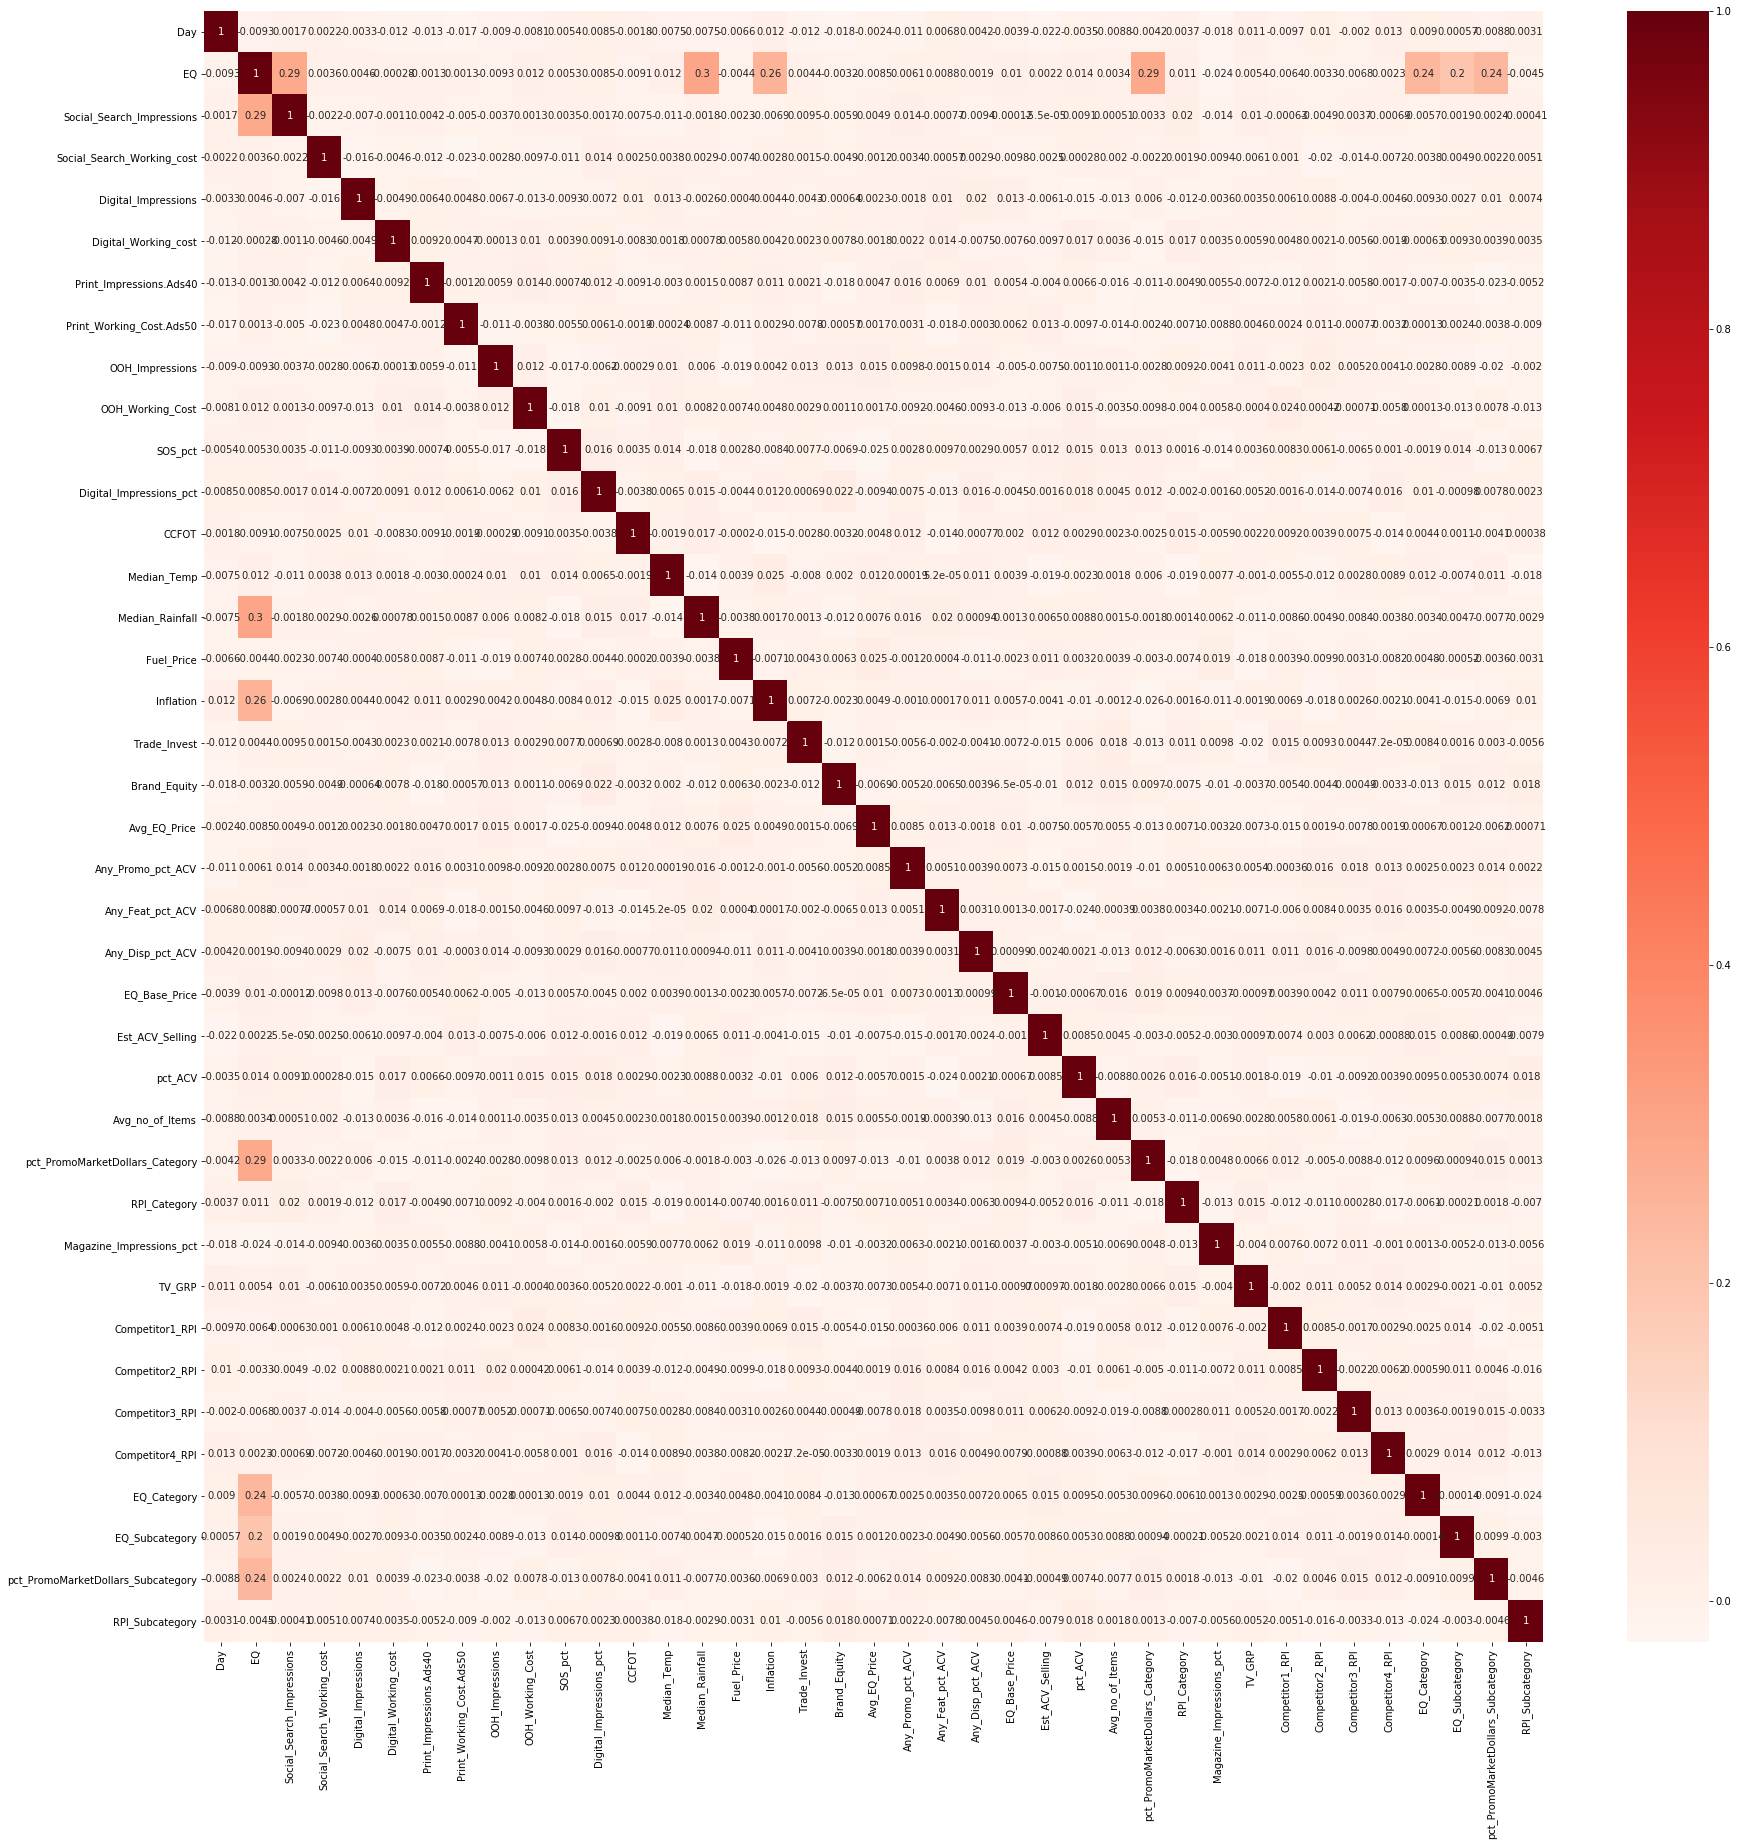

In [42]:
print('----------------------------------------------Correlation plot-------------------------------------------------')
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#####  Result : Above correlation plot show there is no multicollinearity between the features.

## Model Lasso regression for feature selection.

In [4]:
X = df.drop(labels=['EQ'], axis=1)
y = df['EQ']
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 3762753.432429
Best score using built-in LassoCV: 0.182241


In [44]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print (coef != 0)

Lasso picked 7 variables and eliminated the other 31 variables
Day                                   False
Social_Search_Impressions              True
Social_Search_Working_cost            False
Digital_Impressions                    True
Digital_Working_cost                  False
Print_Impressions.Ads40               False
Print_Working_Cost.Ads50              False
OOH_Impressions                        True
OOH_Working_Cost                       True
SOS_pct                               False
Digital_Impressions_pct               False
CCFOT                                 False
Median_Temp                           False
Median_Rainfall                       False
Fuel_Price                            False
Inflation                             False
Trade_Invest                          False
Brand_Equity                          False
Avg_EQ_Price                          False
Any_Promo_pct_ACV                     False
Any_Feat_pct_ACV                      False
Any_Disp_pct_

Text(0.5, 1.0, 'Feature importance using Lasso Model')

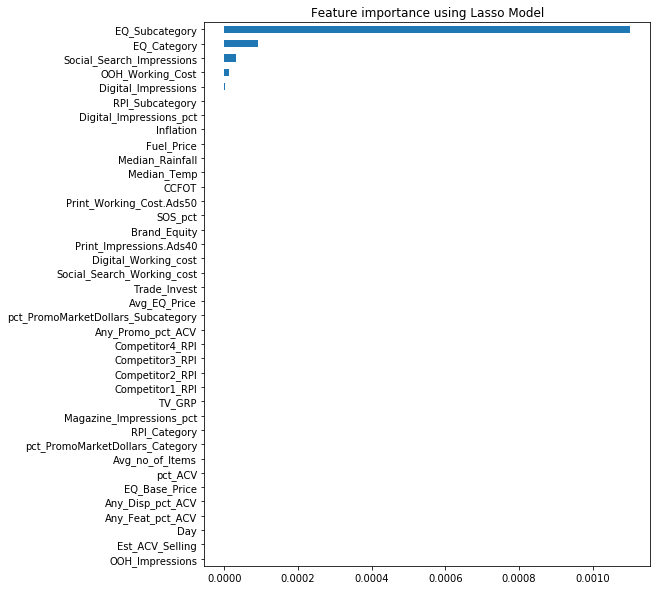

In [5]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

##### Result : Driving feature variables are: EQ_Subcategory, EQ_Category,  Social_Search_Impressions, OOH_Impressions, Digital_Impressions,  Est_ACV_Selling, OOH_Working_Cost

In [6]:
N = 28
df1 = df.groupby(df.index // N).mean()

df1 = df1[['EQ','EQ_Subcategory', 'EQ_Category', 'Social_Search_Impressions', 'OOH_Impressions', 'Digital_Impressions', 'Est_ACV_Selling', 'OOH_Working_Cost']]
df1['Period'] = np.arange(len(df1)) + 1
#df1['Period_In_months'] = 'Period - ' + df1['Period_In_months'].astype(str)
df_train = df1
df_train.tail(4)

,EQ,EQ_Subcategory,EQ_Category,Social_Search_Impressions,OOH_Impressions,Digital_Impressions,Est_ACV_Selling,OOH_Working_Cost,Period
425,600.953389,587655.821429,6.627989e+06,1.921844e+07,4.827890e+08,6.602958e+06,5.410304e+08,1.720016e+06,426
426,556.501310,564983.035714,6.402340e+06,1.974705e+07,4.738623e+08,5.963004e+06,5.602297e+08,2.012024e+06,427
427,402.032170,579644.857143,6.611903e+06,1.954544e+07,5.050919e+08,6.486859e+06,5.354389e+08,1.987043e+06,428
428,439.885146,510220.625000,6.516725e+06,2.342516e+07,4.111010e+08,6.624991e+06,4.650658e+08,2.000084e+06,429


In [47]:
#df_final.to_csv(r'C:\Users\deepa\OneDrive\Documents\DataScience-POC-Usecase\Final_Training-Data-Sets.csv', index = False)

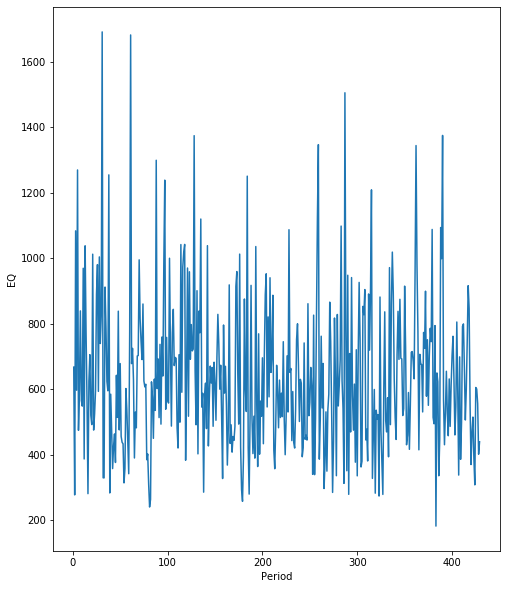

In [7]:
plt.plot(df_train['Period'], df_train['EQ'])
plt.xlabel('Period')
plt.ylabel('EQ')  
plt.show() 

In [8]:
#Plot show this is seasonal data so will test stationay or not 
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_train['EQ'])

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(EQ):
    result=adfuller(EQ)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adfuller_test(df_train['EQ'])

ADF Test Statistic : -18.904867596062346
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 428
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [11]:
df_test = pd.read_csv(r"C:\Users\deepa\OneDrive\Documents\DataScience-POC-Usecase\Data\Test dataset v1.csv")
df_test = df_test[['EQ']]
df_test
df_train = df_train[['EQ']]
df_train

,EQ
0,667.858556
1,277.717426
2,1083.904871
3,597.319170
4,1269.848862
...,...
424,605.673938
425,600.953389
426,556.501310
427,402.032170


In [12]:
#appending train and test dataset into one dataframe name 'df_train'
df_train=df_train.append(df_test,ignore_index=True)
df_train

,EQ
0,667.858556
1,277.717426
2,1083.904871
3,597.319170
4,1269.848862
...,...
463,175.432319
464,168.106665
465,161.529279
466,151.642231


,EQ
374,551.191576
375,703.099860
376,786.325218
377,745.604946
378,1088.182339
...,...
463,175.432319
464,168.106665
465,161.529279
466,151.642231


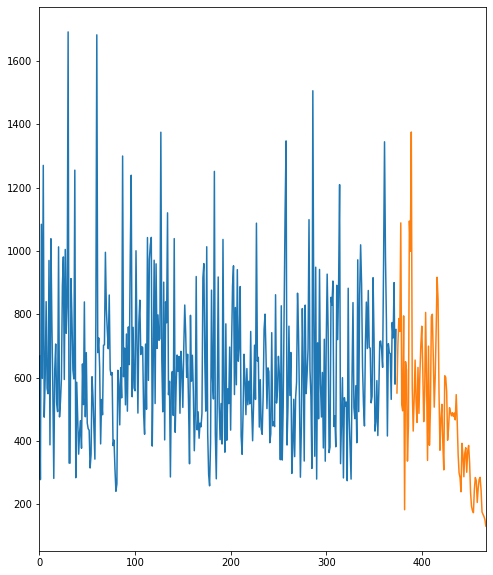

In [49]:
#plotting the data train['EQ'].plot() valid['EQ'].plot() 
#plt.plot(test['Period'], test['EQ'])
#plt.xlabel('Month')
#plt.ylabel('EQ')  
#plt.show() 
 
#df_train = df_train.drop(['Period'], axis = 1)
#df_test = df_test.drop(['Period'], axis = 1) 

#divide into train and validation set
X_train = df_train[:int(0.8*(len(df_train)))]
X_test = df_train[int(0.8*(len(df_train))):]

X_train['EQ'].plot()
X_test['EQ'].plot()
X_test

In [92]:
#building the modelusing Auto ARIMA
# from pmdarima import auto_arima

# model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
# model.fit(train)

# forecast = model.predict(n_periods=len(test))
# forecast = pd.DataFrame(forecast,index = test.index,columns=['EQ'])


stepwise_model = auto_arima(X_train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                            d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

print("AIC : ", stepwise_model.aic())

stepwise_model.fit(X_train)

future_forecast = stepwise_model.predict(n_periods=94)


print("--------------------------Forecasted Data---------------------")
print(future_forecast)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5036.198, BIC=5055.642, Fit time=1.514 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5420.907, BIC=5428.685, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5277.382, BIC=5292.938, Fit time=0.865 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5035.213, BIC=5050.768, Fit time=1.549 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5035.373, BIC=5054.817, Fit time=2.763 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5215.074, BIC=5226.741, Fit time=0.247 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5035.281, BIC=5054.725, Fit time=6.185 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5039.036, BIC=5062.369, Fit time=7.392 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=5253.767, BIC=5265.434, Fit time=1.281 seconds
Fit ARIMA: order=(0, 1, 2) s

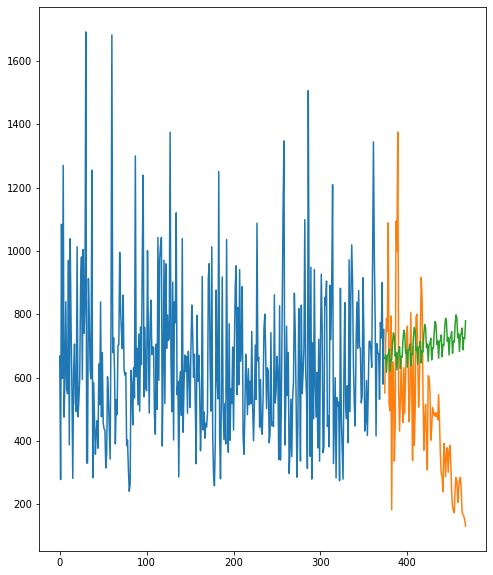

In [93]:
# import cufflinks as cf
# X_test.iplot(title="Sales forecast")

future_forecast = pd.DataFrame(future_forecast,index = X_test.index,columns=["EQ"])
# pd.concat([X_test,future_forecast],axis=1).plot()

#plot the predictions for validation set
plt.plot(X_train, label='Train')
plt.plot(X_test, label='Test')
plt.plot(future_forecast, label='Prediction')
plt.show()

In [94]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(X_test, future_forecast))
print("Root Mean Squared Error : ", rmse)

Root Mean Squared Error :  331.29133555733233


In [95]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

forecast_accuracy(future_forecast, X_test)

C:\Users\deepa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\deepa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\deepa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning:

invalid value encountered in multiply



{'mape': EQ    0.918403
 dtype: float64, 'me': EQ    213.033349
 dtype: float64, 'mae': EQ    283.899223
 dtype: float64, 'mpe': EQ    0.845839
 dtype: float64, 'rmse': EQ    331.291336
 dtype: float64, 'corr': nan}